# Import Session level data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_trans = pd.read_csv('../Project/data/train_trans.csv', index_col=0)

Split the data into Train and test sets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_trans.drop(['is_transaction', 'fullVisitorId', 'transactionRevenue'], axis=1), 
    df_trans['transactionRevenue'], test_size=0.33, random_state=42)

# Tree-Based Regression: RandomForestRegressor 

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42,n_estimators = 100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_y_pred = reg.predict(X_test)
np.place(reg_y_pred, reg_y_pred<0, 0)

# Regularization: Lasso

In [5]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)
lasso_y_pred = lasso_reg.predict(X_test)
np.place(reg_y_pred, reg_y_pred<0, 0)

# Bagging + SVR

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
bg_svr = BaggingRegressor(base_estimator=SVR(),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.01, n_estimators=100, n_jobs=-1)
bg_svr.fit(X_train, y_train)
svr_y_pred = bg_svr.predict(X_test)

# Compare metrics for all Four models

$\bullet$ RMSE

In [7]:
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_y_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
rmse = [('random_forest', rf_rmse),('linear regression', reg_rmse), ('lasso', lasso_rmse), ('SVR', svr_rmse)]
for i in rmse:
    print('{}: {}'.format(i[0],i[1]))

random_forest: 45685138.141020775
linear regression: 42678498.61433511
lasso: 42710009.996953
SVR: 43526740.04366963


$\bullet R^2$

In [8]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_y_pred)
reg_r2 = r2_score(y_test, reg_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
r2 = [('random_forest', rf_r2), ('linear regression', reg_r2), ('lasso', reg_r2), ('SVR', svr_r2)]
for i in r2:
    print('{}: {}'.format(i[0],i[1]))

random_forest: -0.10334518563468653
linear regression: 0.037103106894960325
lasso: 0.037103106894960325
SVR: -0.0015526924412965215


Overall, these models are not suitable for our transcation level data. The negative explained variance / r2 is an indicater that this is actually doing worse than a mean-prediction.

# Import User level data

In [9]:
df_user = pd.read_csv('../Project/data/train_user.csv', index_col=0)

Split the data into Train and test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_user.drop(['is_transaction', 'fullVisitorId', 'transactionRevenue_total'], axis=1), 
    df_user['transactionRevenue_total'], test_size=0.33, random_state=42)

# Tree Based Regression: RandomForest 

Grid Search for random forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([('rf',RandomForestRegressor(random_state = 42,n_jobs =-1))]) 

grid_params = dict(rf__n_estimators = [70,100])
    
gridSearch = GridSearchCV(estimator=pipe_rf,  
                  param_grid=grid_params, cv = 5)
    
gridSearch.fit(X_train, y_train)
best_params = gridSearch.best_params_
print(best_params)

{'rf__n_estimators': 100}


Fit the best random forest model grid search find for us 

In [12]:
rf = RandomForestRegressor(random_state = 42,n_estimators = 100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_y_pred = reg.predict(X_test)

Since some of the prediction value is negative, we replace negative value with zero

In [14]:
np.place(reg_y_pred, reg_y_pred<0, 0)

# Regularization: Lasso

Gridsearch for Regularization

In [15]:
from sklearn.linear_model import Lasso
pipe_lasso = Pipeline([('lasso',Lasso())]) 

grid_params = dict(lasso__alpha = [0.01,0.05,0.1])
    
gridSearch = GridSearchCV(estimator=pipe_lasso,  
                  param_grid=grid_params, cv = 5)
    
gridSearch.fit(X_train, y_train)
best_params = gridSearch.best_params_
print(best_params)

{'lasso__alpha': 0.01}


In [16]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)
lasso_y_pred = lasso_reg.predict(X_test)

In [17]:
np.place(lasso_y_pred, reg_y_pred<0, 0)

# Bagging + SVR

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
bg_svr = BaggingRegressor(base_estimator=SVR(),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.01, n_estimators=100, n_jobs=-1)
bg_svr.fit(X_train, y_train)
svr_y_pred = bg_svr.predict(X_test)

# Compare metrics for all Four models 

$\bullet$ RMSE

In [19]:
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_y_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
rmse = [('random_forest', rf_rmse),('linear regression', reg_rmse), ('lasso', lasso_rmse), ('SVR', svr_rmse)]
for i in rmse:
    print('{}: {}'.format(i[0],i[1]))

random_forest: 1.7039473434159111
linear regression: 1.8363604849670425
lasso: 1.844478516487366
SVR: 2.049210691312704


$\bullet R^2$

In [20]:
from sklearn.metrics import r2_score
rf_r2 = r2_score(y_test, rf_y_pred)
reg_r2 = r2_score(y_test, reg_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
r2 = [('random_forest', rf_r2), ('linear regression', reg_r2), ('lasso', reg_r2), ('SVR', svr_r2)]
for i in r2:
    print('{}: {}'.format(i[0],i[1]))

random_forest: 0.3311288937384106
linear regression: 0.22313425122977026
lasso: 0.22313425122977026
SVR: 0.03260614944823104


$\bullet$Explained Variance

In [21]:
from sklearn.metrics import explained_variance_score
rf_ev = explained_variance_score(y_test, rf_y_pred)
reg_ev = explained_variance_score(y_test, reg_y_pred)
lasso_ev = explained_variance_score(y_test, lasso_y_pred)
svr_ev = explained_variance_score(y_test, svr_y_pred)
ev = [('random_forest', rf_ev), ('linear regression', reg_ev), ('lasso', lasso_ev), ('svr', svr_ev) ]
for i in r2:
    print('{}: {}'.format(i[0],i[1]))

random_forest: 0.3311288937384106
linear regression: 0.22313425122977026
lasso: 0.22313425122977026
SVR: 0.03260614944823104


# Model selection

Based on RMSE and $R^2$, $RandomForestRegression^{TM}$ is the best model among regression only models we trained.

$\bullet$ Feature importance based on $RandomForestRegression^{TM}$

In [22]:
import matplotlib.pyplot as plt
features = df_user.columns[3:]
importances = rf.feature_importances_
indices = np.argsort(importances)[44:55]

Text(0.5, 0, 'Relative Importance')

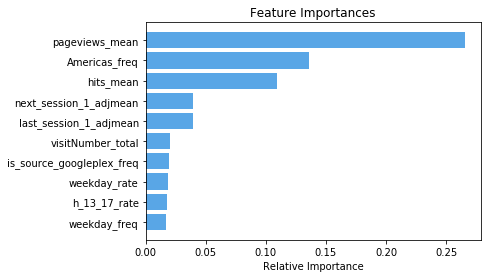

In [23]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=(0.35,0.65,0.9), align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')